In [123]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({ 'font.size' : 15, 'xtick.labelsize':15, 'ytick.labelsize':15 })

In [124]:
data = pd.read_csv('births.csv')
# remove nan values
data = data.dropna()
# remove lines where day = 99
data = data[data.day != 99]

In [125]:
year = pd.cut(data['year'], [1960, 1970, 1980, 1990])
visu = data.pivot_table('births', year, 'month', aggfunc='sum')
visu

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
"(1960, 1970]",596016,552006,603644,569490,587014,594698,648514,652036,644778,635762,606294,643698
"(1970, 1980]",2752425,2553947,2776784,2609183,2710739,2686452,2919502,2979968,2924062,2866497,2696224,2786956
"(1980, 1990]",2410724,2256993,2487712,2382230,2487467,2477546,2652279,2677760,2637333,2553113,2392970,2473722


In [126]:
date_df = data.loc[:, ['year', 'month', 'day']]
date = pd.to_datetime(date_df, format='%Y-%m-%d', errors='coerce')

In [127]:
date_df = date.to_frame()
date_df = date_df.rename(columns={0:"date"})

In [138]:
data = data.loc[:, ['gender', 'births']]
data = pd.concat([date_df, data], axis=1)
data['day'] = data['date'].dt.day_name()

In [141]:
visu = data.pivot_table('births', year, 'day', aggfunc='sum')
visu

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
"(1960, 1970]",1078904,1072594,982794,918524,1066176,1123488,1090704
"(1970, 1980]",4982204,4882617,4358362,4137862,4885094,5074669,4941667
"(1980, 1990]",4532122,4416584,3750348,3590602,4483536,4615642,4501015


In [158]:
visu = visu.rename(columns={'Friday':'Fri',
                            'Monday':'Mon',
                            'Saturday':'Sat',
                            'Sunday':'Sun',
                            'Thursday':'Thu',
                            'Tuesday': 'Tue',
                            'Wednesday':'Wed'})

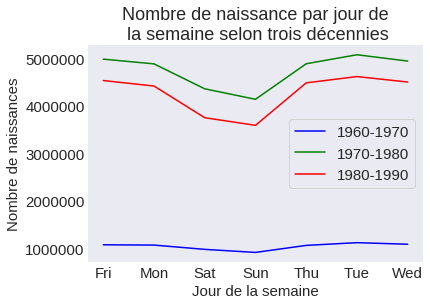

In [160]:
fig, ax = plt.figure(), plt.axes()
plt.plot(visu.iloc[0], color='blue', label='1960-1970')
plt.plot(visu.iloc[1], color='green', label='1970-1980')
plt.plot(visu.iloc[2], color='red', label='1980-1990')
ax.set(xlabel='Jour de la semaine', ylabel='Nombre de naissances')
plt.title("Nombre de naissance par jour de\n la semaine selon trois décennies")
plt.legend(loc='center right', frameon=True)